### Curso de Python para Finanças Quantitativas

#### Aula 3 - Automação com loops e iterações 
#### Autor: Leandro Guerra - Outspoken Market
#### Download em: https://www.outspokenmarket.com/pythonfinancasquantitativas.html

In [1]:
# Carregando as bibliotecas necessarias

from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### Loops e iterações 

In [ ]:
#Podem ser condicionais, sequenciais ou existir enquanto uma condicao nao for alcançada

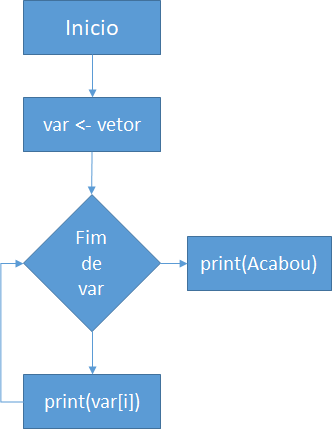

In [2]:
# O seu primeiro loop

var = "Eu vou aprender a programar"

In [3]:
var

'Eu vou aprender a programar'

In [7]:
for qualquer_coisa in var:
   print (qualquer_coisa)

E
u
 
v
o
u
 
a
p
r
e
n
d
e
r
 
a
 
p
r
o
g
r
a
m
a
r


In [8]:
# O seu primeiro loop

var = ["Eu","vou","aprender","a","programar"]

In [9]:
var

['Eu', 'vou', 'aprender', 'a', 'programar']

In [10]:
for palavra in var:
   print (palavra)

Eu
vou
aprender
a
programar


In [13]:
# Loop for com o if

dias_mes = list(range(1, 31))

print(dias_mes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [14]:
for dias in dias_mes:
    if dias > 25:
        print ('Ja passou do dia 15. Hoje é dia: ', dias)

Ja passou do dia 15. Hoje é dia:  26
Ja passou do dia 15. Hoje é dia:  27
Ja passou do dia 15. Hoje é dia:  28
Ja passou do dia 15. Hoje é dia:  29
Ja passou do dia 15. Hoje é dia:  30
Ja passou do dia 15. Hoje é dia:  31


___________________________________________

### Automação com Funções

In [15]:
# Parametros da funçao

ticker = "^BVSP"
inicio = "2015-01-01"
fim = "2021-04-12"

In [16]:
ibov = pdr.get_data_yahoo(ticker, start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [17]:
def om_bollinger(data_frame, periodo, desvios, alvo):
    
    df = data_frame
    df["desvio"] = df["Adj Close"].rolling(periodo).std()
    df["MM"] = df["Adj Close"].rolling(periodo).mean()
    df["Banda_Sup"] = df["MM"] + (df["desvio"]*desvios)
    df["Banda_Inf"] = df["MM"] - (df["desvio"]*desvios)
    
    # Filtrando os valores missing
    df = df.dropna(axis = 0) 
    
    # Construcao dos alvos
    df.loc[:, "Retorno"] = df["Adj Close"].pct_change(alvo)
    df.loc[:, "Alvo"] = df["Retorno"].shift(-alvo)
    
    # Filtrando os valores missing
    df = df.dropna(axis = 0) 
    
    # Criando a regra de trade
    df.loc[:, "Regra"] = np.where(df.loc[:, "Adj Close"] > df.loc[:, "Banda_Sup"], 1, 0)
    df.loc[:, "Regra"] = np.where(df.loc[:, "Adj Close"] < df.loc[:, "Banda_Inf"], -1, df.loc[: , "Regra"])

    # Aplicando a regra no alvo
    df.loc[:, "Trade"] = df.loc[:, "Regra"]*df.loc[:, "Alvo"]
    
    # Calculando o resultado acumulado em juros simples
    df.loc[:, "Retorno_Trade_BB"] = df["Trade"].cumsum()*100
    
    return(df)

In [18]:
periodos = [5, 10, 15, 20]
resultado = 0
melhor_periodo = 0

In [19]:
for periodo in periodos:
    aux = om_bollinger(ibov, periodo, 2, 5).iloc[-1][-1]
    if aux > resultado:
        resultado = aux
        melhor_periodo = periodo

In [20]:
print(resultado)
print(melhor_periodo)

94.75663248894679
20


In [21]:
om_bollinger(ibov, melhor_periodo, 2, 5).iloc[-1][-1]

94.75663248894679

In [22]:
periodos = [5, 10, 15, 20, 25]
desvios = [1, 1.5, 2, 2.5, 3]
resultado = 0
melhor_periodo = 0
melhor_desvio = 0

In [23]:
for periodo in periodos:
    for desvio in desvios:
        aux = om_bollinger(ibov, periodo, desvio, 5).iloc[-1][-1]
        if aux > resultado:
            resultado = aux
            melhor_periodo = periodo
            melhor_desvio = desvio

In [24]:
print(resultado)
print(melhor_periodo)
print(melhor_desvio)

334.12086858607034
25
1


In [25]:
periodos = [5, 10, 15, 20, 25]
desvios = [1, 1.5, 2, 2.5, 3]
alvos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
resultado = 0
melhor_periodo = 0
melhor_desvio = 0
melhor_alvo = 0

In [26]:
for periodo in periodos:
    for desvio in desvios:
        for alvo in alvos:
            aux = om_bollinger(ibov, periodo, desvio, alvo).iloc[-1][-1]
            if aux > resultado:
                resultado = aux
                melhor_periodo = periodo
                melhor_desvio = desvio
                melhor_alvo = alvo

In [27]:
print(resultado)
print(melhor_periodo)
print(melhor_desvio)
print(melhor_alvo)

854.9651892911697
25
1
10


In [28]:
# Funçao para plotar o grafico

def plot_resultado(data_frame):
    data_frame["Retorno_Trade_BB"].plot(figsize=(20, 15), linewidth = 3, fontsize = 15, color = "green")
    plt.xlabel("Data"
           , fontsize = 15);
    plt.ylabel("%"
           , fontsize = 15);
    plt.title("Resultado BB Trading - Python Finanças Quantitativas"
           , fontsize = 25)
    plt.legend();

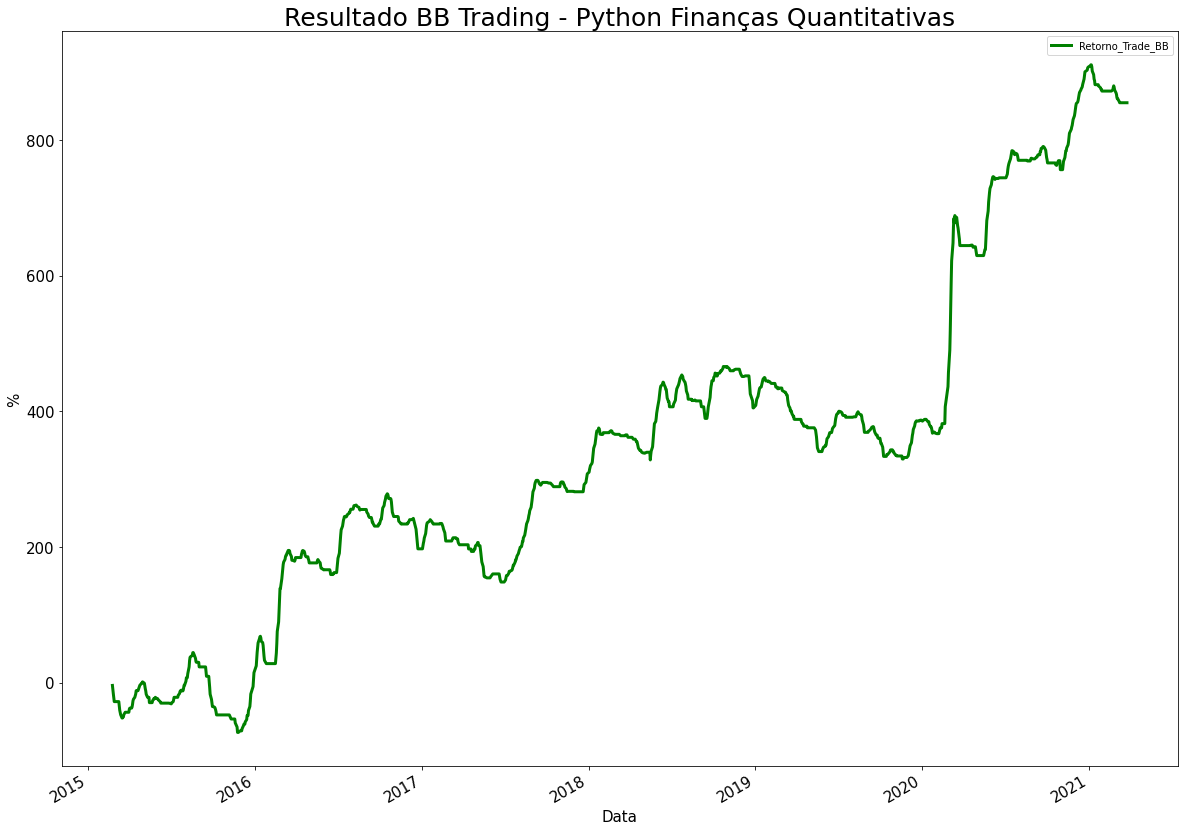

In [29]:
plot_resultado(om_bollinger(ibov, melhor_periodo, melhor_desvio, melhor_alvo))